In [1]:
# Random Forest algorithm to classify network traffic

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import socket, struct

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import pydotplus

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np

In [3]:
nRowsRead = 500000 # specify 'None' if want to read whole file
#We are going to load KaggleImbalanced.csv which is used on preprocessed CSV file ( Dataset-Unicauca-Version2-87Atts.csv ). 
# KaggleImbalanced.csv has 3577296 rows in reality, but we are only loading/previewing the first 2 000 000 rows
# change the path to where the file KaggleImbalanced.csv is in the local
df =  pd.read_csv (r'C:\Users\Pc\Downloads\ENSEEIHT_etudes\Annee_3\Projet_long\classification_machine_learning\datas\KaggleImbalanced.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'KaggleImbalanced.csv'
nRow, nCol = df.shape

print(f'There are {nRow} rows and {nCol} columns')

There are 498918 rows and 84 columns


In [4]:
feats = [x for x in df.columns if (x != 'ProtocolName' and x != 'Flow.ID' and x != 'Timestamp' and x != 'Label' )]
X = df[feats].astype(float)
Y = df['ProtocolName']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [6]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [7]:
dt.tree_.node_count, dt.tree_.max_depth

(53, 10)

In [8]:
dt.score(X_test, y_test)

1.0

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [10]:
rf.n_classes_, rf.n_features_

(27, 83)

In [11]:
rf.score(X_test, y_test)

0.9886238710421943

In [12]:
model = RandomForestClassifier()
param_grid = {'max_depth':[30,40,50],
              'n_estimators':[20,30,40,50],  
              'max_features':['auto','log2'],
              'criterion':['gini','entropy']}
GR = GridSearchCV(estimator = model, param_grid = param_grid, scoring='accuracy', cv=6)

In [13]:
X.head()


Source.IP  Source.Port  Destination.IP  Destination.Port  Protocol  \
0  2.886927e+09      52422.0    1.808812e+08            3128.0       6.0   
1  1.808812e+08       3128.0    2.886927e+09           52422.0       6.0   
2  8.409398e+08         80.0    1.808814e+08           38848.0       6.0   
3  8.409398e+08         80.0    1.808814e+08           38848.0       6.0   
4  3.232254e+09      55961.0    1.808812e+08            3128.0       6.0   

   Flow.Duration  Total.Fwd.Packets  Total.Backward.Packets  \
0        45523.0               22.0                    55.0   
1            1.0                2.0                     0.0   
2            1.0                3.0                     0.0   
3          217.0                1.0                     3.0   
4        78068.0                5.0                     0.0   

   Total.Length.of.Fwd.Packets  Total.Length.of.Bwd.Packets  ...  \
0                        132.0                     110414.0  ...   
1                         12.0                          0.0  ...   
2                        674.0                          0.0  ...   
3                          0.0                          0.0  ...   
4                       1076.0                          0.0  ...   

   min_seg_size_forward  Active.Mean  Active.Std  Active.Max  Active.Min  \
0                  20.0          0.0         0.0         0.0         0.0   
1                  20.0          0.0         0.0         0.0         0.0   
2                  32.0          0.0         0.0         0.0         0.0   
3                  32.0          0.0         0.0         0.0         0.0   
4                  20.0          0.0         0.0         0.0         0.0   

   Idle.Mean  Idle.Std  Idle.Max  Idle.Min  L7Protocol  
0        0.0       0.0       0.0       0.0       131.0  
1        0.0       0.0       0.0       0.0       131.0  
2        0.0       0.0       0.0       0.0         7.0  
3        0.0       0.0       0.0       0.0         7.0  
4        0.0       0.0       0.0       0.0       131.0  

[5 rows x 83 columns]

In [14]:
Y.head()

0    HTTP_PROXY
1    HTTP_PROXY
2          HTTP
3          HTTP
4    HTTP_PROXY
Name: ProtocolName, dtype: object

In [18]:
rf = RandomForestClassifier(max_depth=60, n_estimators=100, max_features='auto', criterion='entropy')

In [19]:
%%time
rf.fit(X_train, y_train)

Wall time: 8min 40s


RandomForestClassifier(criterion='entropy', max_depth=60)

In [20]:
%%time
rf.score(X_test, y_test)

Wall time: 8.37 s


0.9870264754650973

In [21]:
%%time
y_pred = rf.predict(X_test)

Wall time: 8.44 s


In [22]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

        AMAZON       0.96      0.94      0.95      2701
         APPLE       0.95      0.88      0.92       498
  APPLE_ITUNES       0.95      0.64      0.77        64
    CLOUDFLARE       0.98      0.98      0.98       864
 CONTENT_FLASH       0.99      0.97      0.98       147
           DNS       1.00      0.98      0.99        57
       DROPBOX       0.99      0.92      0.95      1090
      FACEBOOK       0.98      0.96      0.97      1188
         GMAIL       0.96      0.85      0.90      1474
        GOOGLE       0.99      1.00      0.99     41072
          HTTP       1.00      1.00      1.00     36839
  HTTP_CONNECT       0.99      1.00      1.00     15564
    HTTP_PROXY       0.98      1.00      0.99     22789
       IP_ICMP       1.00      1.00      1.00        80
     MICROSOFT       0.97      0.94      0.96      3520
           MSN       0.98      0.82      0.89       578
  MS_ONE_DRIVE       0.94      0.74      0.83  

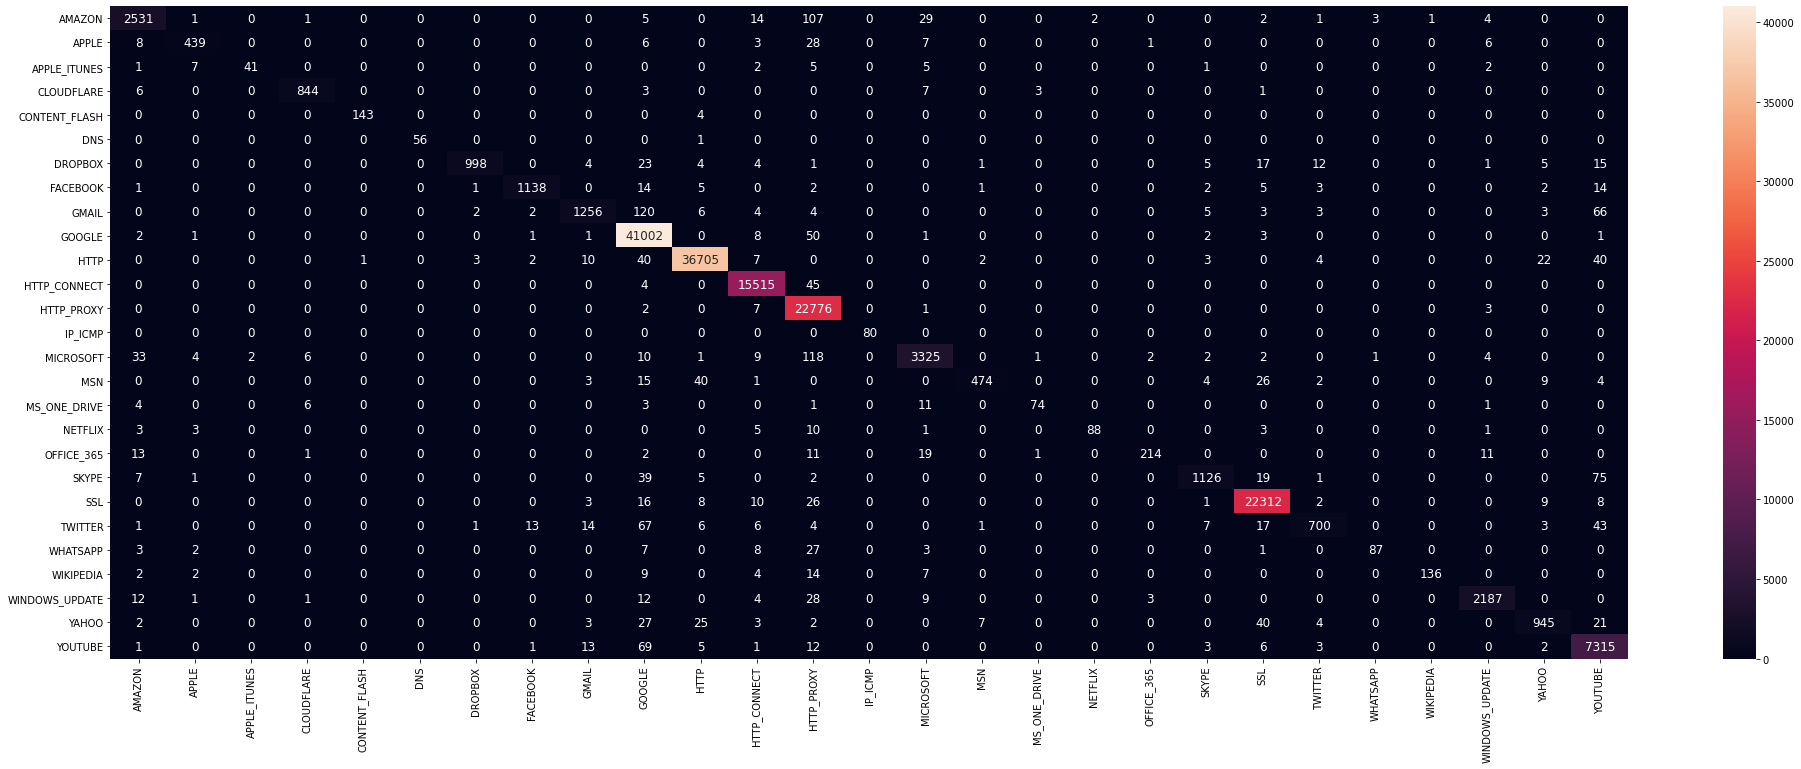

In [23]:
label = pd.get_dummies(df['ProtocolName'])
cf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred,
                                         labels = label.columns),
                        columns = label.columns,
                        index = label.columns)
#cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(34,12)) 
sns.heatmap(cf_matrix,annot=True, ax=ax, fmt='d', annot_kws={"size": 12})
plt.savefig("RF_cf2.png")

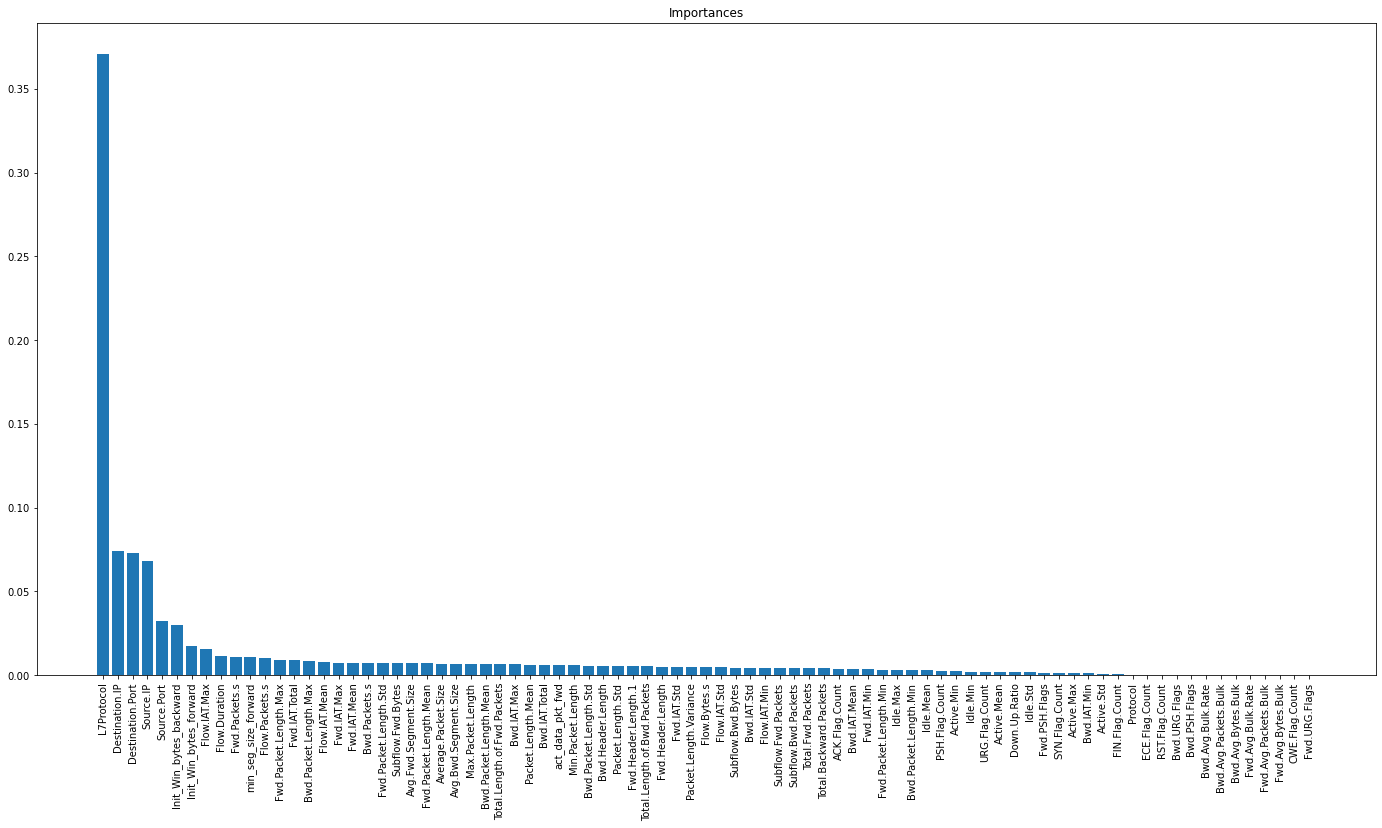

In [24]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [feats[i] for i in indices]
plt.figure(figsize=(24,12))
plt.title("Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.savefig("RF_features.png")

In [25]:
estimator = rf.estimators_[7]

In [27]:
dot_data=tree.export_graphviz(estimator)

In [28]:
graph=pydotplus.graph_from_dot_data(dot_data)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0272111 to fit



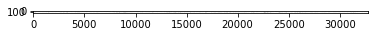

In [29]:
graph.write_png('tree.png')    
plt.imshow(plt.imread('tree.png'))